# Data Lookthrough - First Look

In [4]:
import pandas as pd 
import numpy as np 
import sys
import matplotlib.pyplot as plt
import os

In [3]:
filepath = "../../mtsamples_with_rand_names.csv"
data = pd.read_csv(filepath)
data.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords,first_name,last_name
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",James,Rehkop
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",Chester,Truong
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart...",Shannon,Maurin
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",Domingo,Green
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",Eugene,Hewitt


## Data Information

In [17]:
data.shape

(4999, 8)

In [27]:
data.isna().sum()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
first_name              0
last_name               0
dtype: int64

In [30]:
data["description"][4]

' 2-D Echocardiogram'

In [19]:
data["medical_specialty"][0]

' Allergy / Immunology'

In [21]:
data["transcription"][0]

'SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,

In [22]:
data["transcription"][1]

'PAST MEDICAL HISTORY:, He has difficulty climbing stairs, difficulty with airline seats, tying shoes, used to public seating, and lifting objects off the floor.  He exercises three times a week at home and does cardio.  He has difficulty walking two blocks or five flights of stairs.  Difficulty with snoring.  He has muscle and joint pains including knee pain, back pain, foot and ankle pain, and swelling.  He has gastroesophageal reflux disease.,PAST SURGICAL HISTORY:, Includes reconstructive surgery on his right hand 13 years ago.  ,SOCIAL HISTORY:, He is currently single.  He has about ten drinks a year.  He had smoked significantly up until several months ago.  He now smokes less than three cigarettes a day.,FAMILY HISTORY:, Heart disease in both grandfathers, grandmother with stroke, and a grandmother with diabetes.  Denies obesity and hypertension in other family members.,CURRENT MEDICATIONS:, None.,ALLERGIES:,  He is allergic to Penicillin.,MISCELLANEOUS/EATING HISTORY:, He has b

In [36]:
data["sample_name"].value_counts()

sample_name
 Lumbar Discogram                           5
 Abdominal Pain - Consult                   4
 Hypergranulation - Consult                 4
 Chest Pain & Respiratory Insufficiency     4
 Normal Newborn H&P Template                4
                                           ..
 Port-A-Cath Insertion - 4                  1
 CT Facial                                  1
 Chronic Kidney Disease - Followup          1
 Port-A-Cath Insertion - 3                  1
 Autopsy - 4                                1
Name: count, Length: 2377, dtype: int64

### Limitations

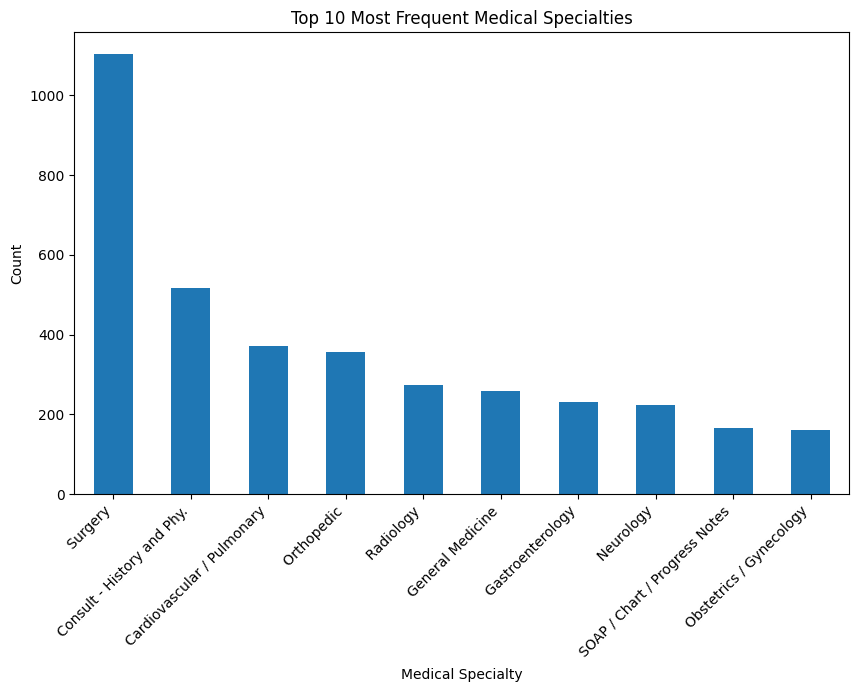

In [33]:
# Bias
specialty_counts = data['medical_specialty'].value_counts()

# Get the top 10 most frequent medical specialties
top_10_specialties = specialty_counts.head(10)

# Plot a bar chart
plt.figure(figsize=(10, 6))
top_10_specialties.plot(kind='bar')
plt.title('Top 10 Most Frequent Medical Specialties')
plt.xlabel('Medical Specialty')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [34]:
data['full_name'] = data['first_name'] + ' ' + data['last_name']
name_counts = data['full_name'].value_counts()
multiple_appearances = name_counts[name_counts > 1]
print(multiple_appearances)

full_name
Michael Brown        3
Terry Moore          2
Robert Jones         2
Donald Phillips      2
Richard Smith        2
Steven Walker        2
Robert Williams      2
Christopher Lewis    2
Ruth Wilson          2
David Davis          2
David Carpenter      2
Willie Morales       2
Richard Morgan       2
William Morris       2
John Martinez        2
Michael Lewis        2
John Hayes           2
Joseph Hall          2
Judy Garcia          2
Michael Clark        2
John Stewart         2
Mary Brown           2
Frank Williams       2
Megan Johnson        2
Denise Alexander     2
James Allen          2
James Schwing        2
James Anderson       2
Robert Surratt       2
Ann Williams         2
Michael Miller       2
Name: count, dtype: int64


In [7]:
def count_words_in_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
        words = content.split()
        return len(words)

def count_words_in_directory(directory):
    word_counts = {}
    for filename in os.listdir(directory):
        if filename.endswith('.md'):
            file_path = os.path.join(directory, filename)
            word_count = count_words_in_file(file_path)
            word_counts[filename] = word_count
    return word_counts

directory = '../../data'  # specify the directory containing .md files
words_ls = []
word_counts = count_words_in_directory(directory)
for filename, word_count in word_counts.items():
    #print(f"{filename}: {word_count} words")
    words_ls.append(word_count)


In [9]:
max(words_ls)

3060